# Hypotesis:
### 1) Is being born early in the year an advantage to make it to the big leage?
### 2) Whats the most likely state to create Pro Baseball player?
### 3) Do they move on their retirement? Death state
### 4) whats was the average weight?
### 5) whats was the average height?
(findings are tentative only)

In [201]:
#First import libraies
import io #to request data from a link
import requests #to request data from a link
import csv
import os #to see working directory where we are located
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats #to discard outliers
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.patches as mpatches
# matplotlib Enable inline plotting
%matplotlib inline
# pylanb inline is a command that lets you show plots in ipython notebook.
%pylab inline 
#sets size in all documents graph
pylab.rcParams['figure.figsize'] = (18.5, 10.5)

Populating the interactive namespace from numpy and matplotlib


In [202]:
#where are we working
os.getcwd()

'C:\\Users\\Ney\\Desktop'

In [203]:
#review what python version we are using, Pandas and Matplotlib
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 2.7.11 |Anaconda 4.0.0 (64-bit)| (default, Feb 16 2016, 09:58:36) [MSC v.1500 64 bit (AMD64)]
Pandas version 0.18.0
Matplotlib version 1.5.1


In [204]:
#set up format
sns.set(style="white", color_codes=True) #sets the background color https://stanford.edu/~mwaskom/software/seaborn/tutorial/aesthetics.html
plt.rcParams["axes.labelsize"] = 16.
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["legend.fontsize"] = 12.
plt.rcParams["figure.figsize"] = [15., 6.]

In [205]:
#import the data and read it and example

url="https://gist.githubusercontent.com/Neyt/1dfb0709ba68af2cd11db2d0d837419e/raw/0e6e4d8667cde9ca7135a2b5a5dac5bf5883c548/Master.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))
df.head(6) #we are just printing the first 6 roads

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01
5,abadfe01,1985.0,12.0,17.0,D.R.,La Romana,La Romana,NaN,NaN,NaN,...,Abad,Fernando Antonio,220.0,73.0,L,L,2010-07-28,2015-10-03,abadf001,abadfe01


Step Three - Data wrangling
Analyze data. they are called arrays. they suport a vectorized operations. "+" doesnt concatenate it adds. exponentiate **. And &, or  not 


In [206]:
#variables in the spread sheet:
df.info() #and type of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18846 entries, 0 to 18845
Data columns (total 24 columns):
playerID        18846 non-null object
birthYear       18703 non-null float64
birthMonth      18531 non-null float64
birthDay        18382 non-null float64
birthCountry    18773 non-null object
birthState      18220 non-null object
birthCity       18647 non-null object
deathYear       9336 non-null float64
deathMonth      9335 non-null float64
deathDay        9334 non-null float64
deathCountry    9329 non-null object
deathState      9277 non-null object
deathCity       9325 non-null object
nameFirst       18807 non-null object
nameLast        18846 non-null object
nameGiven       18807 non-null object
weight          17975 non-null float64
height          18041 non-null float64
bats            17655 non-null object
throws          17868 non-null object
debut           18653 non-null object
finalGame       18653 non-null object
retroID         18792 non-null object
bbrefID        

Now we are going to see how much data is in the DataFrame and how mush is incomplete (Nan)

In [207]:
print "Number of columns (variables):", df.shape[1] #gives number of column count
Number_of_players = len(df)
print "Number of rows (players):", len(df)
print "how many Nan are in the DataFrame:"
df.isnull().sum()

Number of columns (variables): 24
Number of rows (players): 18846
how many Nan are in the DataFrame:


playerID           0
birthYear        143
birthMonth       315
birthDay         464
birthCountry      73
birthState       626
birthCity        199
deathYear       9510
deathMonth      9511
deathDay        9512
deathCountry    9517
deathState      9569
deathCity       9521
nameFirst         39
nameLast           0
nameGiven         39
weight           871
height           805
bats            1191
throws           978
debut            193
finalGame        193
retroID           54
bbrefID            1
dtype: int64

Now we are going to drop the incomplete Data.

In [208]:
#drop the NaN
df=df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

now lets verify that we dropped all the incomplete data:

In [209]:
print "Number of columns (variables) after dropping Nan:", df.shape[1] #gives number of col count
Number_of_players = len(df)
print "Number of rows (players) after dropping Nan:", len(df)
print "how many Nan are in the DataFrame:"
df.isnull().sum()

Number of columns (variables) after dropping Nan: 24
Number of rows (players) after dropping Nan: 7743
how many Nan are in the DataFrame:


playerID        0
birthYear       0
birthMonth      0
birthDay        0
birthCountry    0
birthState      0
birthCity       0
deathYear       0
deathMonth      0
deathDay        0
deathCountry    0
deathState      0
deathCity       0
nameFirst       0
nameLast        0
nameGiven       0
weight          0
height          0
bats            0
throws          0
debut           0
finalGame       0
retroID         0
bbrefID         0
dtype: int64

now that the missing data is taken care of. Let visualize whats left:

In [210]:
df.describe() #we can see the data statistics

,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay,weight,height
count,7743.000000,7743.000000,7743.000000,7743.000000,7743.000000,7743.000000,7743.000000,7743.000000
mean,1900.986956,6.623531,15.505489,1970.784192,6.487537,15.486116,176.676999,71.229498
std,22.802567,3.478568,8.747864,27.370872,3.526783,8.800512,15.984142,2.359051
min,1836.000000,1.000000,1.000000,1877.000000,1.000000,1.000000,65.000000,43.000000
25%,1886.000000,4.000000,8.000000,1953.000000,3.000000,8.000000,165.000000,70.000000
50%,1900.000000,7.000000,15.000000,1972.000000,6.000000,15.000000,175.000000,71.000000
75%,1917.000000,10.000000,23.000000,1993.000000,10.000000,23.000000,185.000000,73.000000
max,1992.000000,12.000000,31.000000,2016.000000,12.000000,31.000000,320.000000,81.000000


In [211]:
#take outliers off hight and weight
df = df[np.abs(df.height-df.height.mean())<=(3*df.height.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'df.height'.
df = df[np.abs(df.weight-df.weight.mean())<=(3*df.weight.std())]

In [212]:
df.describe() #we can see the data statistics

,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay,weight,height
count,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000
mean,1900.956590,6.620816,15.499738,1970.803086,6.487578,15.490063,176.427694,71.231695
std,22.649828,3.479740,8.750916,27.313464,3.524482,8.803830,14.989417,2.257905
min,1840.000000,1.000000,1.000000,1877.000000,1.000000,1.000000,130.000000,65.000000
25%,1886.000000,4.000000,8.000000,1953.000000,3.000000,8.000000,165.000000,70.000000
50%,1900.000000,7.000000,15.000000,1972.000000,6.000000,15.000000,175.000000,71.000000
75%,1917.000000,10.000000,23.000000,1993.000000,10.000000,23.000000,185.000000,73.000000
max,1992.000000,12.000000,31.000000,2016.000000,12.000000,31.000000,223.000000,78.000000


Is this summary we can see that we are left with 7743 culumns accross the board.

In [213]:
#describe only columns with text on them
df.describe(include = ['O'])

,playerID,birthCountry,birthState,birthCity,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,bats,throws,debut,finalGame,retroID,bbrefID
count,7648,7648,7648,7648,7648,7648,7648,7648,7648,7648,7648,7648,7648,7648,7648,7648
unique,7648,14,123,3065,9,84,2328,1190,4777,5574,3,2,4479,4510,7648,7648
top,glenned01,USA,PA,Chicago,USA,CA,Philadelphia,Bill,Smith,John Joseph,R,R,1942-04-14,1945-09-30,gerab101,glenned01
freq,1,7415,823,236,7516,970,135,323,73,45,5115,6268,20,39,1,1


In [214]:
#describe columns with text and data.
df.describe(include = 'all')

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
count,7648,7648.000000,7648.000000,7648.000000,7648,7648,7648,7648.000000,7648.000000,7648.000000,...,7648,7648,7648.000000,7648.000000,7648,7648,7648,7648,7648,7648
unique,7648,NaN,NaN,NaN,14,123,3065,NaN,NaN,NaN,...,4777,5574,NaN,NaN,3,2,4479,4510,7648,7648
top,glenned01,NaN,NaN,NaN,USA,PA,Chicago,NaN,NaN,NaN,...,Smith,John Joseph,NaN,NaN,R,R,1942-04-14,1945-09-30,gerab101,glenned01
freq,1,NaN,NaN,NaN,7415,823,236,NaN,NaN,NaN,...,73,45,NaN,NaN,5115,6268,20,39,1,1
mean,NaN,1900.956590,6.620816,15.499738,NaN,NaN,NaN,1970.803086,6.487578,15.490063,...,NaN,NaN,176.427694,71.231695,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,22.649828,3.479740,8.750916,NaN,NaN,NaN,27.313464,3.524482,8.803830,...,NaN,NaN,14.989417,2.257905,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1840.000000,1.000000,1.000000,NaN,NaN,NaN,1877.000000,1.000000,1.000000,...,NaN,NaN,130.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1886.000000,4.000000,8.000000,NaN,NaN,NaN,1953.000000,3.000000,8.000000,...,NaN,NaN,165.000000,70.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1900.000000,7.000000,15.000000,NaN,NaN,NaN,1972.000000,6.000000,15.000000,...,NaN,NaN,175.000000,71.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1917.000000,10.000000,23.000000,NaN,NaN,NaN,1993.000000,10.000000,23.000000,...,NaN,NaN,185.000000,73.000000,NaN,NaN,NaN,NaN,NaN,NaN


## Making Histograms to Summarize the given data, and see patterns

# 1) Is being born early in the year an advantage to make it to the big leage? 


Mean: 6.62081589958
Minimum: 1.0
Maximum: 12.0


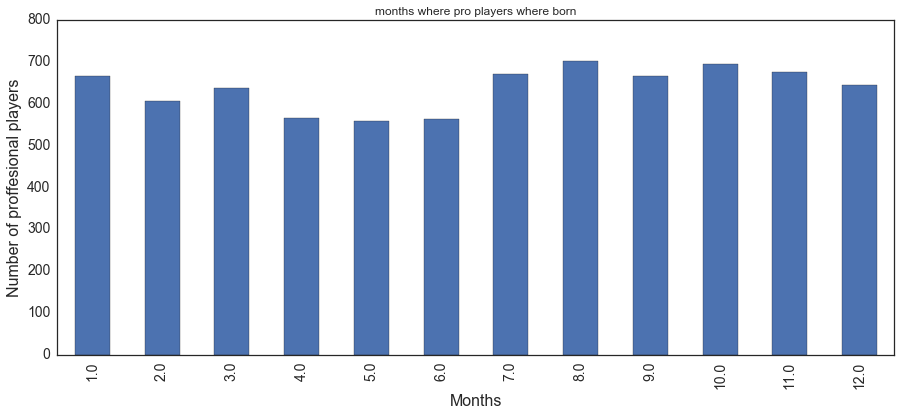

In [215]:
#we create a function to see, mean, max and min. Also plot the data for a quick analysis.
def review_info(data, bins, xlabel, ylabel):
    print 'Mean:', np.mean(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)
    df.groupby(['birthMonth'])['playerID'].count().plot(kind='bar')
    #plt.hist(data,bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    
#graph month of birth in 12 different bins
review_info(df.birthMonth, 12, 'Months', 'Number of proffesional players')
plt.title('months where pro players where born')


## conclusion:
Being born early in the year does not look like creating a significance advantage to make it into the as a proffesional baseball player.

# 2) Whats the most likely state to create Pro Baseball player?

In [216]:
print 'numbers of birthds according to state:'
births_per_state=df.birthState.value_counts()
births_per_state

numbers of birthds according to state:


PA                    823
IL                    576
OH                    565
NY                    563
CA                    485
MA                    406
MO                    333
TX                    329
NC                    238
IN                    213
NJ                    200
MI                    190
TN                    167
AL                    163
GA                    148
MD                    140
WI                    137
KY                    134
KS                    132
IA                    128
VA                    117
OK                    108
LA                     94
AR                     89
SC                     85
MS                     84
CT                     84
WV                     75
MN                     72
WA                     61
                     ... 
Jalisco                 1
El Seibo                1
Novara                  1
Silesian                1
St. Thomas              1
Staffordshire           1
West Midlands           1
Canal Zone  

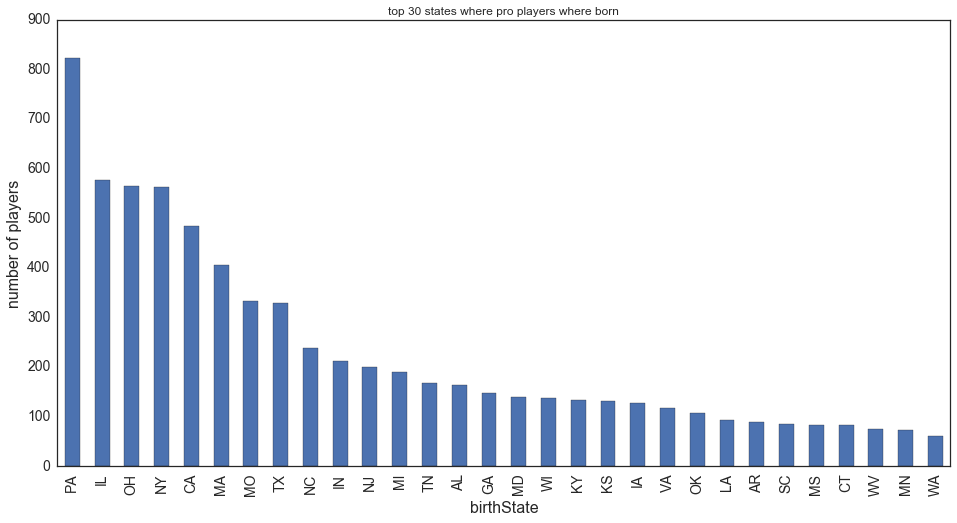

In [217]:
#graphical representation of the information above
plt.figure(figsize=(16, 8))
pd.value_counts(df.birthState).iloc[:30].plot(kind='bar').set_xlabel('birthState');
plt.title('top 30 states where pro players where born')
plt.ylabel('number of players');


## conclusion:
The most likely state (we have registered 7743 players with a state) to create Pro Baseball player is Pennsylvania(PA) with 835,
thats a 10.78% of the total. 
followed by Illinois (IL) with 585 (7.55%).
Taken on account the development of population US vs Pensilvanya since the 1900's(http://goo.gl/9AmTOA)
We dont have exact figures of the percentage of population of Pennsylvania from the range of this data (1836 to 1992) , but if 
we assume that hasnt change much, today population of Pennsylvania represent 4.01%.

that would mean that Pensylvania in this timeframe produced 268% more professional player than in should have. People in 
Penssylvania love thier baseball



# 3) Do Professional Baseball player moved on their retirement?


In [218]:
#compare both arrays brith State vs death state
#df.birthState vs df.deathState

birth_death_state = np.array(df.birthState) == np.array(df.deathState)
birth_death_state

array([False, False, False, ...,  True, False, False], dtype=bool)

Count True vs False as a %
We know from the data above that we have a size of data of 7743 for player with a Death and Birth state.

In [219]:
#how many people died in the same state:
np.sum(birth_death_state,keepdims=False)

3897

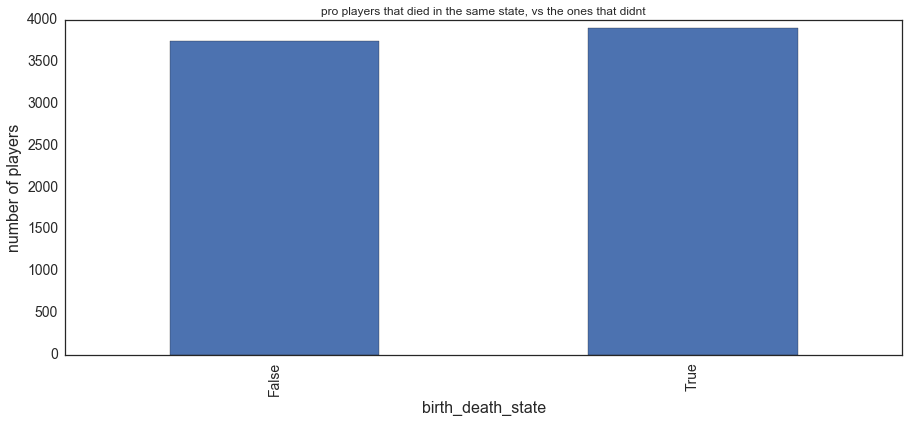

In [220]:
#graph the amount of pro players that died in the same state, vs the ones that didnt. 

df['birth_death_state'] = np.array(df.birthState) == np.array(df.deathState)
df.groupby(['birth_death_state'])['playerID'].count().plot(kind='bar')
plt.title('pro players that died in the same state, vs the ones that didnt');
plt.ylabel('number of players');

## Conclusion: 
The percentage of proffesional players, in our dataframe, that moved (or where in another state) when they died are:

In [221]:
# percentage of players that moved
moved = 100.0*np.sum(birth_death_state,keepdims=False) / df.shape[0]
moved

50.95449790794979

## 4) whats the average weight (in pounds)?

In [222]:
np.average(df.weight)

176.42769351464435

Mean: 176.427693515
Minimum: 130.0
Maximum: 223.0


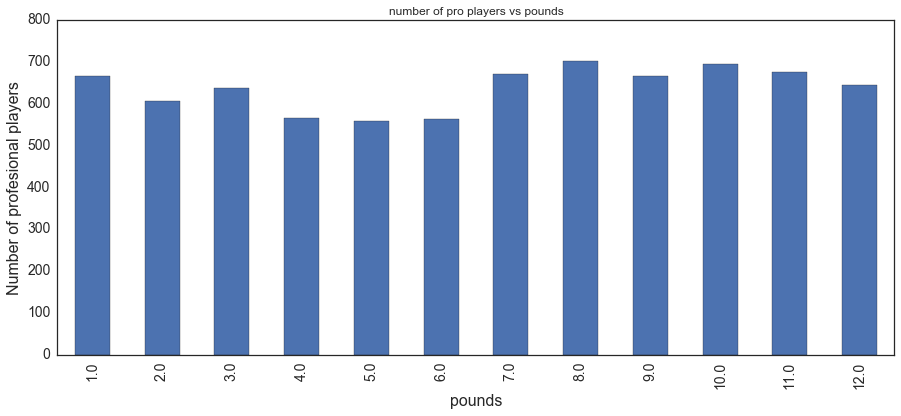

In [223]:
#graph weight in 50 bins
review_info(df.weight, 50, 'pounds', 'Number of profesional players')
plt.title('number of pro players vs pounds');

## Conclusion: 
the average Player weighted 176.67 pounds, and where more likely to be less heavy from if they where born form April to Jun. 

# 5) What was their avarage height? 

In [224]:
#first we check the data we have:
df[['height']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7648 entries, 2 to 18844
Data columns (total 1 columns):
height    7648 non-null float64
dtypes: float64(1)
memory usage: 119.5 KB


Mean: 71.2316945607
Minimum: 65.0
Maximum: 78.0


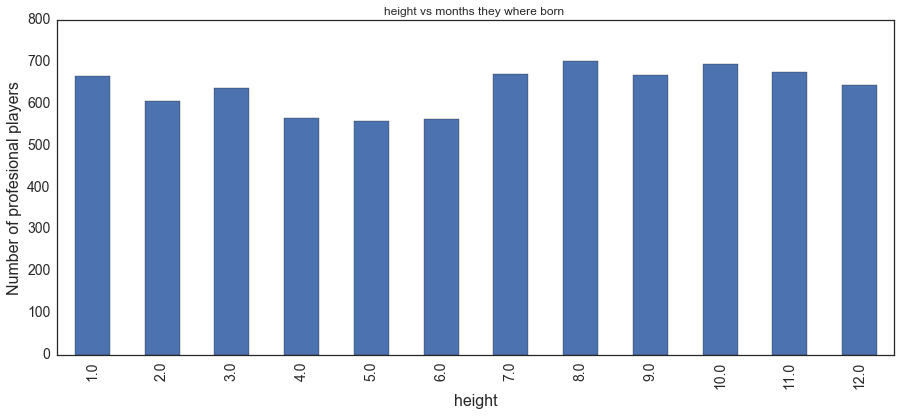

In [225]:
#graph height in months
review_info(df.height, 12, 'height', 'Number of profesional players')
plt.title('height vs months they where born ');

## Conclusion: 
As we can see the average Player height is/was 71.23. with a min of 65 lb and a max of 78. (remember: we have tried this info to take outlier off)

## Exploration Phase extra Multivariable 2d exploration

# - What is the relationship between height and weight?

the correlation between heigh and weight is:
0.662910836429


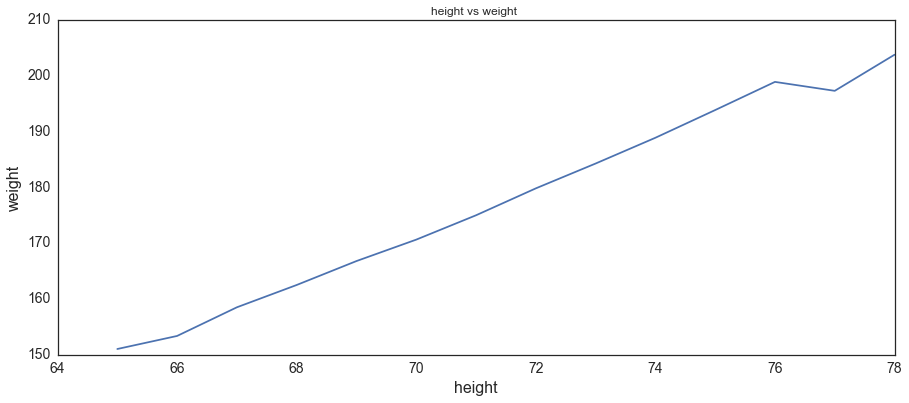

In [226]:
heigh_weight = df.groupby(['height'])['weight'].mean() #I'd gruoped the information for weight and height, and got the mean.

#print the correlation between this 2 variables
print "the correlation between heigh and weight is:"
print pd.Series.corr(df['height'],df['weight'])

#configure chart
plt.xlabel('height')
plt.ylabel('weight')
plot(heigh_weight);
plt.title('height vs weight ');

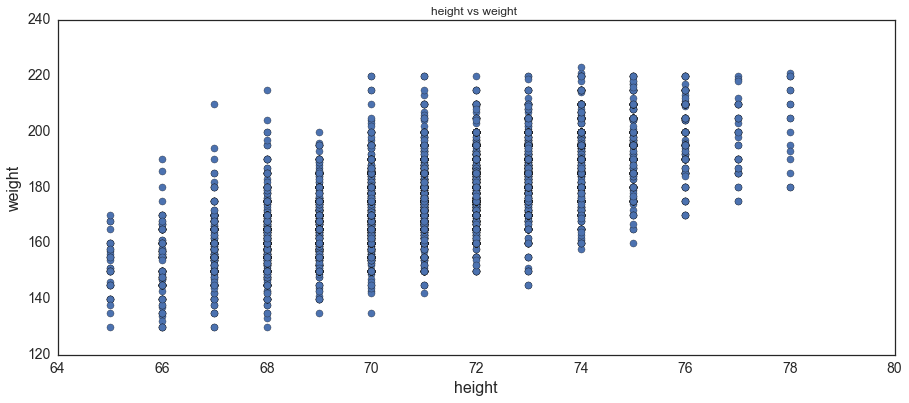

In [227]:
#scatter plot of weight versus height
df.plot.scatter(x='height', y='weight',s=50);
plt.title('height vs weight ');

# conclusion:
There is a positive correlation of 0.66 between Weight and height, as to be spected. 

# Extra Analysis:


In [228]:
#create a function called group to group data to compare it and get the mean.
def group (column):
    groupby= df.groupby(column).mean()
    print groupby
group (df.birthState)

                     birthYear  birthMonth   birthDay    deathYear  \
birthState                                                           
AB                 1919.666667    4.333333   6.000000  1992.333333   
AK                 1906.000000   12.000000  19.000000  1944.000000   
AL                 1911.987730    6.478528  14.717791  1983.269939   
AR                 1909.932584    6.764045  15.561798  1981.303371   
AZ                 1916.333333    7.166667  19.333333  1986.333333   
Aberdeen           1888.000000    6.000000   7.000000  1960.000000   
Anzoategui         1949.000000    2.000000  12.000000  2013.000000   
Aragua             1979.000000    1.000000   3.000000  2011.000000   
BC                 1904.500000    8.500000   7.500000  1969.500000   
Belfast            1880.000000    7.000000  27.000000  1960.000000   
CA                 1914.224742    6.505155  14.977320  1982.874227   
CO                 1903.406250    6.750000  16.562500  1976.062500   
CT                 1

# - Do certain states tend to produce taller or shorter players than other states? 

Lets see the talles players by state first:

In [229]:
state_height = df.groupby('birthState').height.mean()
state_height.nlargest(10)  # only sorts up to the N requested

birthState
Vargas                  77.00
Camaguey                76.00
Aragua                  74.00
Greater Manchester      74.00
NV                      74.00
Puerto Plata            74.00
Valverde                74.00
Monte Cristi            73.50
Pinar del Rio           73.50
San Pedro de Macoris    73.25
Name: height, dtype: float64

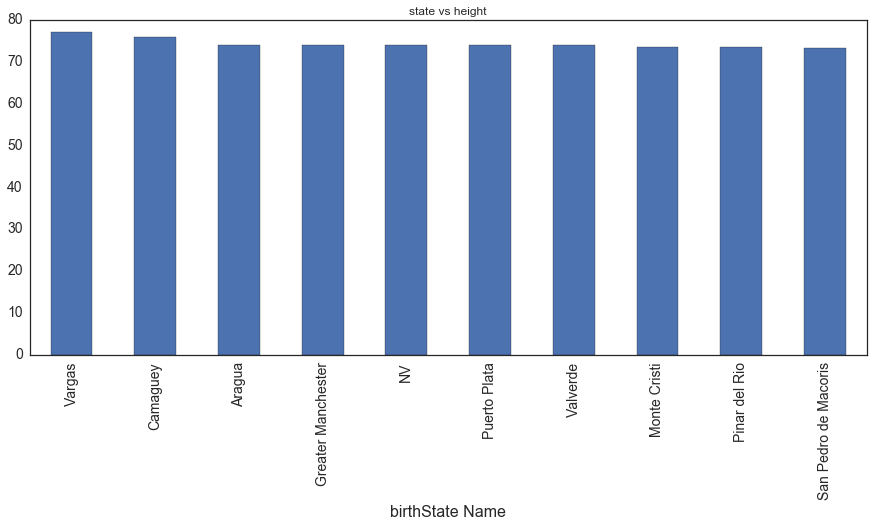

In [230]:
#color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
#plt.figure(figsize=(16, 8))
state_height.nlargest(10).iloc[:29].plot(kind='bar').set_xlabel('birthState Name');
plt.title('state vs height');

# conclusion:
The states that produce the highest players in average are:
Vargas                  77.00
Camaguey                76.00
Aragua                  74.00
Greater Manchester      74.00
NV                      74.00
Puerto Plata            74.00
Valverde                74.00
Monte Cristi            73.50
Pinar del Rio           73.50
San Pedro de Macoris    73.25

Lets see shorter players by state:

In [231]:
#here is a numerical list of the satates with the smallest mean players in inches.
state_height = df.groupby('birthState').height.mean()
state_height.nsmallest(10)  # only sorts up to the N requested

birthState
North Yorkshire    65.000000
New South Wales    67.000000
Swansea            67.000000
London             67.333333
Anzoategui         68.000000
Cienfuegos         68.000000
Staffordshire      68.000000
Suffolk            68.000000
West Midlands      68.000000
Wiltshire          68.000000
Name: height, dtype: float64

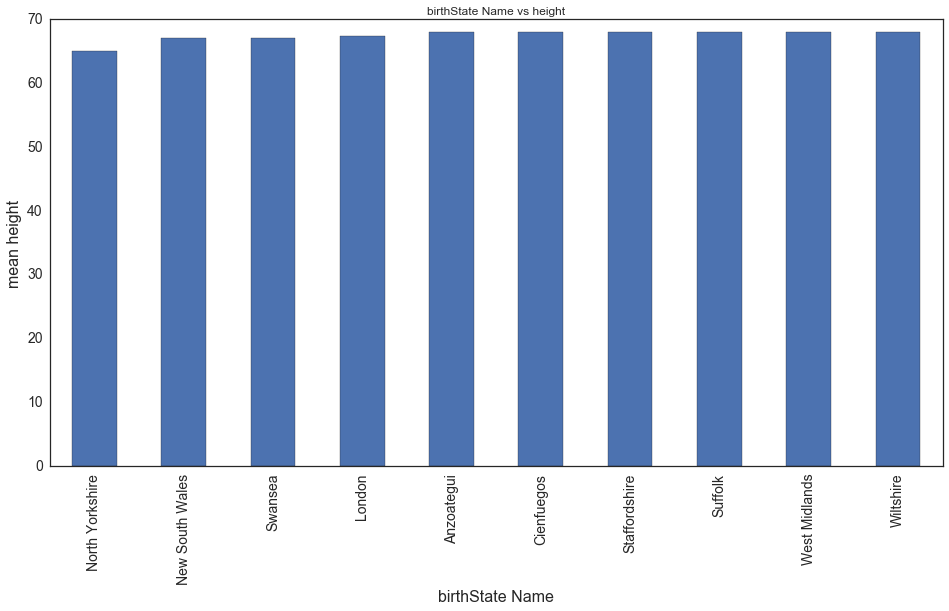

In [232]:
#here is a graphical deployment of the same information the in the former cell.
plt.figure(figsize=(16, 8))
state_height.nsmallest(10).iloc[:29].plot(kind='bar').set_xlabel('birthState Name');
plt.title('birthState Name vs height');
plt.ylabel('mean height');

# conclusion: 
The states that produced the smalles players in average are:
North Yorkshire    65.000000
New South Wales    67.000000
Swansea            67.000000
London             67.333333
Anzoategui         68.000000
Cienfuegos         68.000000
Staffordshire      68.000000
Suffolk            68.000000
West Midlands      68.000000
Wiltshire          68.000000

# What about heavier or lighter players?

In [233]:
#here is a numerical list of the satates with the heaviest players in pounds.
state_weight = df.groupby('birthState').weight.mean()
state_weight.nlargest(10)  # only sorts up to the N requested

birthState
Aragua                215.0
Monte Cristi          205.0
NV                    201.0
Camaguey              200.0
Puerto Plata          200.0
Greater Manchester    195.0
St. Croix             195.0
AK                    190.0
Cienfuegos            190.0
El Seibo              190.0
Name: weight, dtype: float64

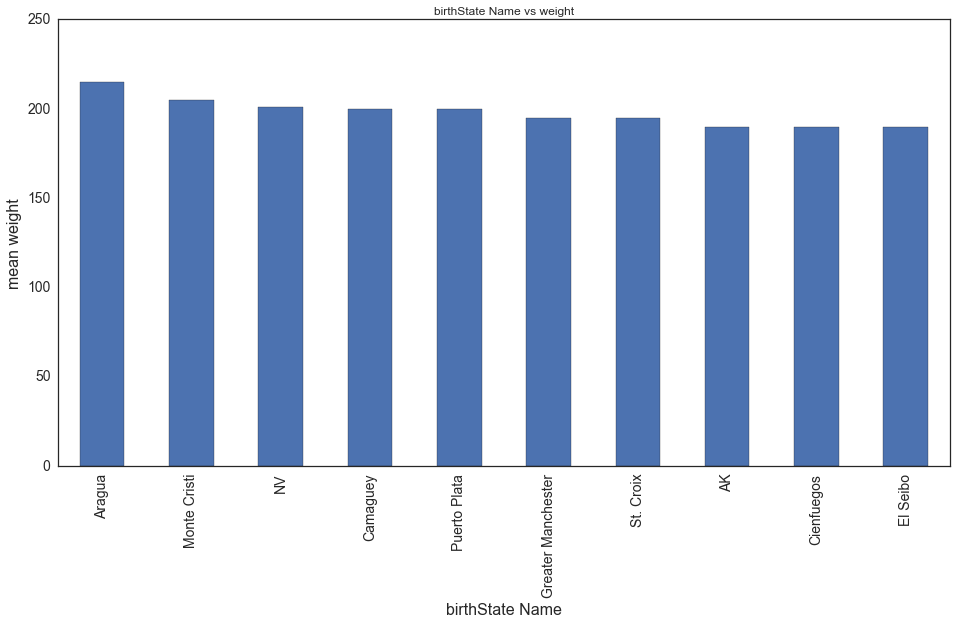

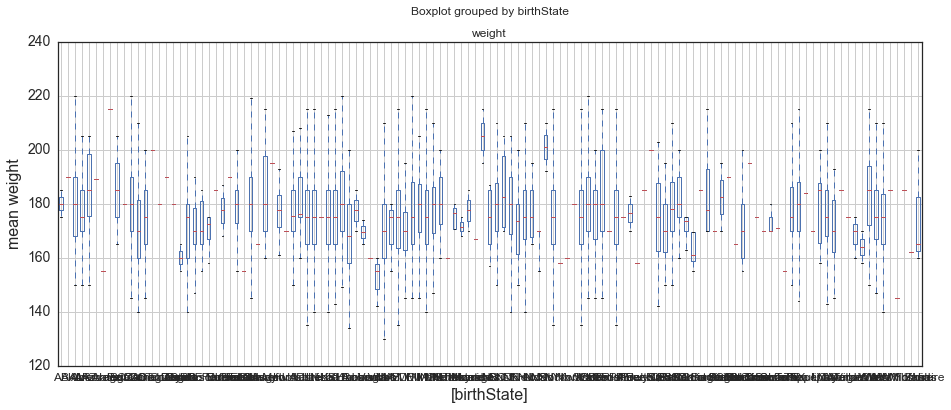

In [234]:
#here are two graphical deployments of the same information the in the former cell.
plt.figure(figsize=(16, 8))
state_weight.nlargest(10).iloc[:29].plot(kind='bar').set_xlabel('birthState Name');
plt.title('birthState Name vs weight');
plt.ylabel('mean weight');

state_height = df.boxplot(column=['weight'], by = ['birthState'])
state_height.set_title('birthState')
state_height.set_title('weight');
plt.ylabel('mean weight');


# conclusion:
The states that created the heaviest players in average where Aragua                215.0
Monte Cristi          205.0
NV                    201.0
Camaguey              200.0
Puerto Plata          200.0
Greater Manchester    195.0
St. Croix             195.0
AK                    190.0
Cienfuegos            190.0
El Seibo              190.0

In [235]:
#here is a numerical list of the satates with the lightests players expressed in pounds.
state_weight = df.groupby('birthState').weight.mean()
state_weight.nsmallest(10)  # only sorts up to the N requested

birthState
West Midlands      145.000000
London             152.333333
Anzoategui         155.000000
Falcon             155.000000
Swansea            155.000000
New South Wales    158.000000
Powys              158.000000
Colon              160.000000
Las Villas         160.000000
Manchester         160.000000
Name: weight, dtype: float64

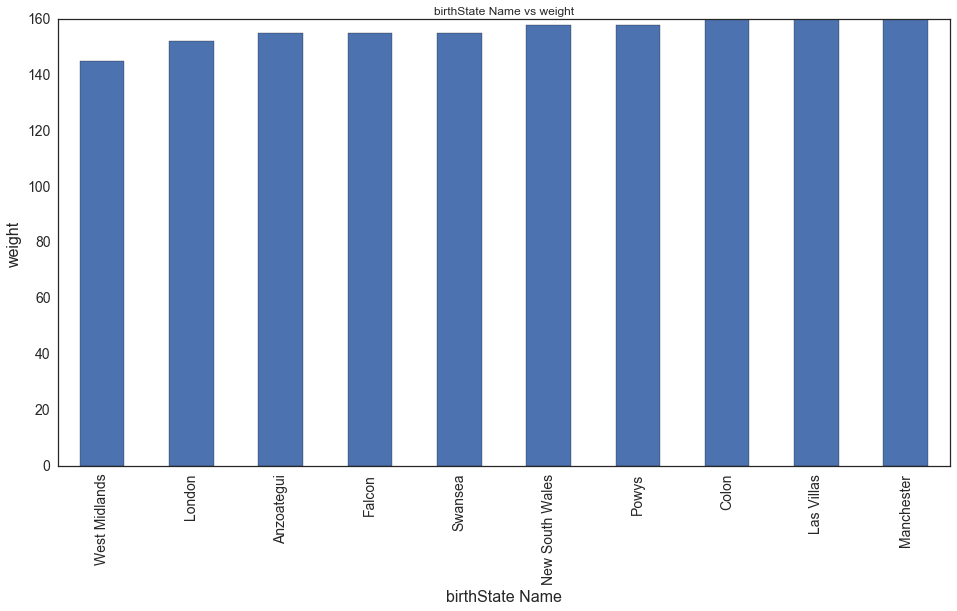

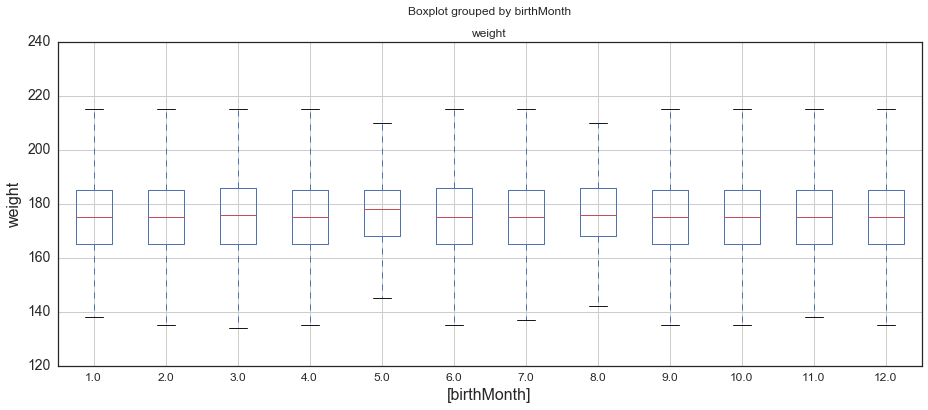

In [236]:
#here are two graphical deployments of the same information the in the former cell.
plt.figure(figsize=(16, 8))
state_weight.nsmallest(10).iloc[:29].plot(kind='bar').set_xlabel('birthState Name')
plt.title('birthState Name vs weight');
plt.ylabel('weight');
state_height = df.boxplot(column=['weight'], by = ['birthMonth'])
state_height.set_title('birthMonth')
state_height.set_title('weight');
plt.ylabel('weight');


# conclusion:
The states that created the lightests players in average where:
West Midlands      145.000000
London             152.333333
Anzoategui         155.000000
Falcon             155.000000
Swansea            155.000000
New South Wales    158.000000
Powys              158.000000
Colon              160.000000
Las Villas         160.000000
Manchester         160.000000

# Is there any realtionship between month you where born and height?

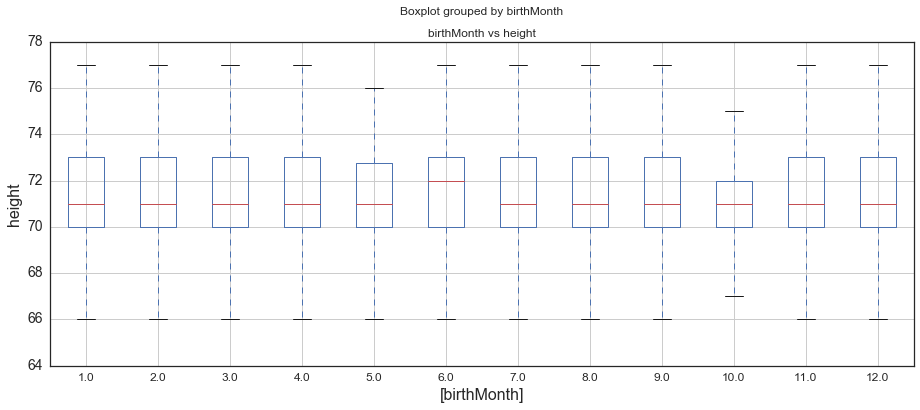

In [237]:
#function to compare 2 variables.
state_height = df.boxplot(column=['height'], by = ['birthMonth'])
state_height.set_title('birthMonth')
state_height.set_title('height');
plt.title('birthMonth vs height');
plt.ylabel('height');


In [238]:
#print the correlation between this 2 variables
print "the correlation between birthMonth and height is:"
print pd.Series.corr(df['birthMonth'],df['height'])

the correlation between birthMonth and height is:
-0.00672558514427


# conclusion:
After a visual inspection and a correlation of 0.006 I conclude that there is no major relationship between month you where born and height. (this conclusions are tentative, as posted at the beggining of this analysis)

# Conclusions Phase

### Limitations and shortcomings of the analysis:
The limitations and shortcomings of the analysis are limited by the data set and the results are tentative only. 
Some o the fields have missing values, and I decided to not take them on account at all. This kind of desicion would affect results in a different way that if we decided to "guess" or "aproximate" thos missing values to create a smother data set.
I decided to do it this way, because I think is the most realistic way to interpret the current data. 

Also I decided to take outlier off in the analysis of "hight and weight" (3 standar desviations) because it seemed the most obvious thing to do . however this could be apply to all data.

     John Maynard Keynes — 'It is better to be roughly right than precisely wrong.' 

the percetange of the missing value in the data set are substantial. We initiated with 18846 rows of data and after depurating all NA (non aplicable or missing data) we where left with 7743 complete rows. 
That is a lost of 58.91% of the data. that is very significant and should be remarked. 

If a more detail analysis wanted to be made with the same data. I suggest depurating (N/A) by case (for each column you are analysing) instead of globally at the beginning. 

However in general terms, I dont think this missing values will affect in a sustantial way the results like mean weight or height. since the sample is still big enough to make it statistically significant. 

### Suggestions:
Finally its important to run a statistical test to appreciate the significance of the results, whenever possible.

### Conclusion summary:
I started this analysis with 5 hypotesis, which I later expanded. 
A detail result is commented under each analysis.
Lets revisit each of your initial hypotheses and what we concluded

### 1) Is being born early in the year an advantage to make it to the big leage?
I came up with this hipotesys after reading a book "outliers by Malcolm Gladwell". It talked about the little hockey leage and how the cut-end-date was unfairly helping kids born in early months to get an advantage, since they are older. and this was notisable more with kids. 
I was wondering if that applied to baseball and the disavnatage would continue throught the years. 
Being born early in the year does not look like creating a significance advantage to make it into the as a proffesional baseball player. The reason for this is that the data shown in graph entittle 'months where pro players where born'

### 2) Whats the most likely state to create Pro Baseball player?
The most likely state (we have registered 7743 players with a state) to create Pro Baseball player is Pennsylvania(PA) with 835,
thats a 10.78% of the total. 
followed by Illinois (IL) with 585 (7.55%).
Taken on account the development of population US vs Pensilvanya since the 1900's(http://goo.gl/9AmTOA)
We dont have exact figures of the percentage of population of Pennsylvania from the range of this data (1836 to 1992) , but if 
we assume that hasnt change much, today population of Pennsylvania represent 4.01%.
that would mean that Pensylvania in this timeframe produced 268% more professional player than in should have. 
People in Penssylvania love their baseball

### 3) Do they move on their retirement? Death state
The percentage of proffesional players, in our dataframe, that moved (or where in another state) when they died are 50.95%. how ever why does this happend is unkonw

### 4) whats was the average weight?
the average Player weighted 176.67 pounds, and where more likely to be less heavy from if they where born form April to Jun.

### 5) whats was the average height?
As we can see the average Player height is/was 71.23 (remember: we have tried this info to take outlier off)

### - What is the relationship between height and weight?
There is a positive correlation of 0.66 between Weight and height, as to be spected. 

### - Do certain states tend to produce taller or shorter players than other states? 

The states that produce the highest players in average are:
Vargas                  77.00
Camaguey                76.00
Aragua                  74.00
Greater Manchester      74.00
NV                      74.00
Puerto Plata            74.00
Valverde                74.00
Monte Cristi            73.50
Pinar del Rio           73.50
San Pedro de Macoris    73.25

Shorter states
North Yorkshire    65.000000
New South Wales    67.000000
Swansea            67.000000
London             67.333333
Anzoategui         68.000000
Cienfuegos         68.000000
Staffordshire      68.000000
Suffolk            68.000000
West Midlands      68.000000
Wiltshire          68.000000

### What about heavier or lighter players?
The states that created the heaviest players in average where Aragua 215.0 Monte Cristi 205.0 NV 201.0 Camaguey 200.0 Puerto Plata 200.0 Greater Manchester 195.0 St. Croix 195.0 AK 190.0 Cienfuegos 190.0 El Seibo 190.0

The states that created the lightests players in average where: West Midlands 145.000000 London 152.333333 Anzoategui 155.000000 Falcon 155.000000 Swansea 155.000000 New South Wales 158.000000 Powys 158.000000 Colon 160.000000 Las Villas 160.000000 Manchester 160.000000
### Is there any realtionship between month you where born and height?

After a visual inspection and a correlation of 0.006 I conclude that there is no major relationship between month you where born and height. (this conclusions are tentative, as posted at the beggining of this analysis)